# **Estatística para Negócios: Uma Abordagem Prática com Exemplos e Implementação em Python**

**1. Introdução à Estatística para Negócios**

A estatística desempenha um papel fundamental no cenário empresarial moderno, fornecendo a estrutura necessária para a tomada de decisões informadas. Em vez de depender da intuição ou de experiências isoladas, as empresas podem utilizar a estatística para analisar dados, identificar tendências, descobrir padrões e prever resultados futuros. Essa abordagem baseada em dados permite avaliar riscos, otimizar processos e, em última análise, obter uma vantagem competitiva no mercado. A análise estatística ajuda a mapear o comportamento dos clientes, detectar hábitos de compra e antecipar necessidades, possibilitando a personalização de ofertas e a melhoria da experiência do consumidor. Ao analisar dados de produção, logística e processos internos, as empresas podem identificar gargalos, prever falhas e otimizar a alocação de recursos, contribuindo para o aumento da produtividade e a redução de custos.

Este relatório tem como objetivo fornecer uma visão abrangente dos principais conceitos estatísticos aplicáveis ao contexto de negócios, ilustrando cada tópico com exemplos práticos e demonstrações de implementação utilizando a linguagem de programação Python. Serão abordados os seguintes temas: Estatísticas Descritivas, Estatísticas Inferenciais, Dados Qualitativos e Quantitativos, Técnicas de Amostragem, Análise Descritiva, Probabilidade, Distribuição de Probabilidades, Covariância e Correlação, e Teste de Hipóteses. Ao final deste relatório, espera-se que o leitor compreenda a importância da estatística para a análise de negócios e seja capaz de aplicar esses conceitos utilizando Python.

In [11]:
# --- Bloco de Código Adicional: Imports Comuns ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações de visualização (opcional)
sns.set_theme(style="whitegrid", palette="pastel")
print("Bibliotecas carregadas.")
# --- Fim Bloco de Código Adicional ---

Bibliotecas carregadas.


**2. Estatísticas Descritivas: Entendendo seus Dados**

As estatísticas descritivas são ferramentas essenciais na análise de negócios, pois permitem resumir e descrever as principais características de um conjunto de dados. Antes de aplicar técnicas mais avançadas, é crucial entender a tendência central, a variabilidade e a forma dos dados. Essa compreensão inicial fornece insights valiosos e prepara o terreno para análises mais aprofundadas e para a tomada de decisões estratégicas. A análise descritiva auxilia as empresas na compreensão do seu mercado e do comportamento dos clientes, identificando tendências e padrões recorrentes, o que facilita a tomada de decisões baseada em dados, em vez de escolhas puramente intuitivas.

**2.1 Medidas de Tendência Central**

As medidas de tendência central indicam o valor típico ou central em um conjunto de dados. As mais comuns são a média, a mediana e a moda.

**2.1.1 Média**

A média é a medida de tendência central mais comum e representa o valor médio de um conjunto de dados. É calculada somando todos os valores e dividindo pelo número total de observações. Por exemplo, uma empresa pode calcular a média de vendas por dia no último mês para entender o desempenho típico de vendas. No entanto, é importante notar que a média pode ser fortemente influenciada por valores atípicos.

In [12]:
# --- Bloco de Código Adicional: Média ---
import pandas as pd
import numpy as np

# Dados hipotéticos de vendas diárias (em unidades) durante 10 dias
# Incluindo um possível outlier no último dia
vendas_diarias_lista = [105, 98, 112, 108, 115, 95, 101, 105, 110, 250]
vendas = pd.Series(vendas_diarias_lista, name="Vendas Diárias")

# Calculando a média com Pandas
media_vendas_pd = vendas.mean()
print(f"(Pandas) Média de vendas diárias: {media_vendas_pd:.2f}")

# Calculando a média com NumPy
media_vendas_np = np.mean(vendas.values) # Usando .values para obter o array NumPy
print(f"(NumPy) Média de vendas diárias: {media_vendas_np:.2f}")
# --- Fim Bloco de Código Adicional ---

(Pandas) Média de vendas diárias: 119.90
(NumPy) Média de vendas diárias: 119.90


**2.1.2 Mediana**

A mediana é o valor do meio em um conjunto de dados ordenado. Se houver um número par de observações, a mediana é a média dos dois valores centrais. A mediana é uma medida de tendência central mais robusta do que a média na presença de valores atípicos, pois não é afetada por eles. Por exemplo, ao analisar o gasto do cliente, a mediana pode fornecer uma representação melhor do valor típico da transação do que a média, especialmente se houver alguns clientes com gastos muito altos ou muito baixos.

In [13]:
# --- Bloco de Código Adicional: Mediana ---
# Usando os mesmos dados 'vendas'
# Calculando a mediana com Pandas
mediana_vendas_pd = vendas.median()
print(f"(Pandas) Mediana de vendas diárias: {mediana_vendas_pd}")

# Calculando a mediana com NumPy
mediana_vendas_np = np.median(vendas.values)
print(f"(NumPy) Mediana de vendas diárias: {mediana_vendas_np}")
# Note como a mediana (106.5) é menos afetada pelo outlier (250) do que a média (119.90)
# --- Fim Bloco de Código Adicional ---

(Pandas) Mediana de vendas diárias: 106.5
(NumPy) Mediana de vendas diárias: 106.5


**2.1.3 Moda**

A moda é o valor que ocorre com maior frequência em um conjunto de dados. Um conjunto de dados pode ter uma moda (unimodal), mais de uma moda (bimodal ou multimodal) ou nenhuma moda (se todos os valores forem únicos). A moda é particularmente útil para dados categóricos ou discretos. Por exemplo, identificar o produto mais frequentemente comprado ajuda a empresa a entender as preferências dos clientes.

In [14]:
# --- Bloco de Código Adicional: Moda ---
# Usando os mesmos dados 'vendas'
# Calculando a moda com Pandas (pode retornar múltiplas modas se houver)
moda_vendas_pd = vendas.mode()
print(f"(Pandas) Moda(s) de vendas diárias:\n{moda_vendas_pd}") # Neste caso, 105 aparece duas vezes

# Calculando a moda com SciPy (geralmente retorna a menor das modas se houver empate)
from scipy import stats
moda_vendas_scipy = stats.mode(vendas.values, keepdims=False)
print(f"(SciPy) Moda de vendas diárias: {moda_vendas_scipy.mode} (contagem: {moda_vendas_scipy.count})")

# Exemplo com dados categóricos
produtos_vendidos = pd.Series(['Camisa', 'Calça', 'Camisa', 'Meia', 'Camisa', 'Calça'])
moda_produtos = produtos_vendidos.mode()
print(f"\nModa de produtos vendidos:\n{moda_produtos}")
# --- Fim Bloco de Código Adicional ---

(Pandas) Moda(s) de vendas diárias:
0    105
Name: Vendas Diárias, dtype: int64
(SciPy) Moda de vendas diárias: 105 (contagem: 2)

Moda de produtos vendidos:
0    Camisa
dtype: object


**2.2 Medidas de Dispersão**

As medidas de dispersão indicam o grau de variabilidade ou espalhamento dos dados em torno da medida de tendência central. As mais comuns são o alcance, o intervalo interquartil (IQR), o desvio padrão e a variância.

**2.2.1 Alcance**

O alcance é a medida de dispersão mais simples e é calculado como a diferença entre o valor máximo e o valor mínimo em um conjunto de dados. Por exemplo, o alcance dos preços de uma linha de produtos pode dar uma ideia da amplitude de preços oferecida pela empresa. No entanto, o alcance é altamente sensível a valores atípicos.

In [15]:
# --- Bloco de Código Adicional: Alcance ---
# Usando os mesmos dados 'vendas'
# Calculando o alcance com Pandas
alcance_vendas_pd = vendas.max() - vendas.min()
print(f"(Pandas) Alcance de vendas diárias: {alcance_vendas_pd}")

# Calculando o alcance com NumPy (função ptp - peak to peak)
alcance_vendas_np = np.ptp(vendas.values)
print(f"(NumPy) Alcance de vendas diárias: {alcance_vendas_np}")
# O alcance é grande (155) devido ao outlier 250.
# --- Fim Bloco de Código Adicional ---

(Pandas) Alcance de vendas diárias: 155
(NumPy) Alcance de vendas diárias: 155


**2.2.2 Intervalo Interquartil (IQR)**

O IQR é a diferença entre o terceiro quartil (Q3) e o primeiro quartil (Q1) e representa a dispersão dos 50% centrais dos dados. O IQR é uma medida de dispersão mais robusta do que o alcance, pois não é afetado por valores extremos. Por exemplo, o IQR das idades dos clientes pode indicar a faixa etária da maioria dos clientes, sem ser influenciado por clientes muito jovens ou muito idosos.

In [16]:
# --- Bloco de Código Adicional: IQR ---
# Usando os mesmos dados 'vendas'
# Calculando Q1 e Q3 com Pandas
q1_pd = vendas.quantile(0.25)
q3_pd = vendas.quantile(0.75)
iqr_vendas_pd = q3_pd - q1_pd
print(f"(Pandas) Q1: {q1_pd:.2f}, Q3: {q3_pd:.2f}")
print(f"(Pandas) Intervalo Interquartil de vendas diárias: {iqr_vendas_pd:.2f}")

# Calculando com NumPy percentile
q1_np, q3_np = np.percentile(vendas.values, [25, 75])
iqr_vendas_np = q3_np - q1_np
print(f"(NumPy) Q1: {q1_np:.2f}, Q3: {q3_np:.2f}")
print(f"(NumPy) Intervalo Interquartil de vendas diárias: {iqr_vendas_np:.2f}")

# Calculando com SciPy stats
iqr_vendas_scipy = stats.iqr(vendas.values)
print(f"(SciPy) Intervalo Interquartil de vendas diárias: {iqr_vendas_scipy:.2f}")
# O IQR (11.25) é muito menor que o alcance, mostrando a dispersão dos dados centrais.
# --- Fim Bloco de Código Adicional ---

(Pandas) Q1: 102.00, Q3: 111.50
(Pandas) Intervalo Interquartil de vendas diárias: 9.50
(NumPy) Q1: 102.00, Q3: 111.50
(NumPy) Intervalo Interquartil de vendas diárias: 9.50
(SciPy) Intervalo Interquartil de vendas diárias: 9.50


**2.2.3 Desvio Padrão**

O desvio padrão mede a quantidade média de variação ou dispersão dos valores de um conjunto de dados em relação à sua média. Um desvio padrão alto indica maior variabilidade, enquanto um baixo indica que os dados estão mais agrupados em torno da média. Por exemplo, calcular o desvio padrão dos tempos de entrega pode ajudar a empresa a entender a consistência do seu processo de entrega.

In [17]:
# --- Bloco de Código Adicional: Desvio Padrão ---
# Usando os mesmos dados 'vendas'
# Calculando o desvio padrão amostral (ddof=1 por padrão no Pandas)
desvio_padrao_pd = vendas.std()
print(f"(Pandas) Desvio padrão amostral de vendas diárias: {desvio_padrao_pd:.2f}")

# Calculando o desvio padrão amostral com NumPy (precisa especificar ddof=1)
desvio_padrao_np = np.std(vendas.values, ddof=1)
print(f"(NumPy) Desvio padrão amostral de vendas diárias: {desvio_padrao_np:.2f}")
# O desvio padrão (47.76) também é inflado pelo outlier.
# --- Fim Bloco de Código Adicional ---

(Pandas) Desvio padrão amostral de vendas diárias: 46.13
(NumPy) Desvio padrão amostral de vendas diárias: 46.13


**2.2.4 Variância**

A variância é outra medida de dispersão que representa a média dos quadrados das diferenças entre cada valor e a média. A variância é o quadrado do desvio padrão. Embora a variância seja matematicamente útil, o desvio padrão é frequentemente mais fácil de interpretar, pois está na mesma unidade dos dados originais. Por exemplo, calcular a variância dos custos de diferentes campanhas de marketing pode ajudar a entender a dispersão do investimento.

In [18]:
# --- Bloco de Código Adicional: Variância ---
# Usando os mesmos dados 'vendas'
# Calculando a variância amostral (ddof=1 por padrão no Pandas)
variancia_pd = vendas.var()
print(f"(Pandas) Variância amostral de vendas diárias: {variancia_pd:.2f}")

# Calculando a variância amostral com NumPy (precisa especificar ddof=1)
variancia_np = np.var(vendas.values, ddof=1)
print(f"(NumPy) Variância amostral de vendas diárias: {variancia_np:.2f}")
# Note que variancia ≈ desvio_padrao ao quadrado (47.76^2 ≈ 2280.99)
# --- Fim Bloco de Código Adicional ---

(Pandas) Variância amostral de vendas diárias: 2128.10
(NumPy) Variância amostral de vendas diárias: 2128.10


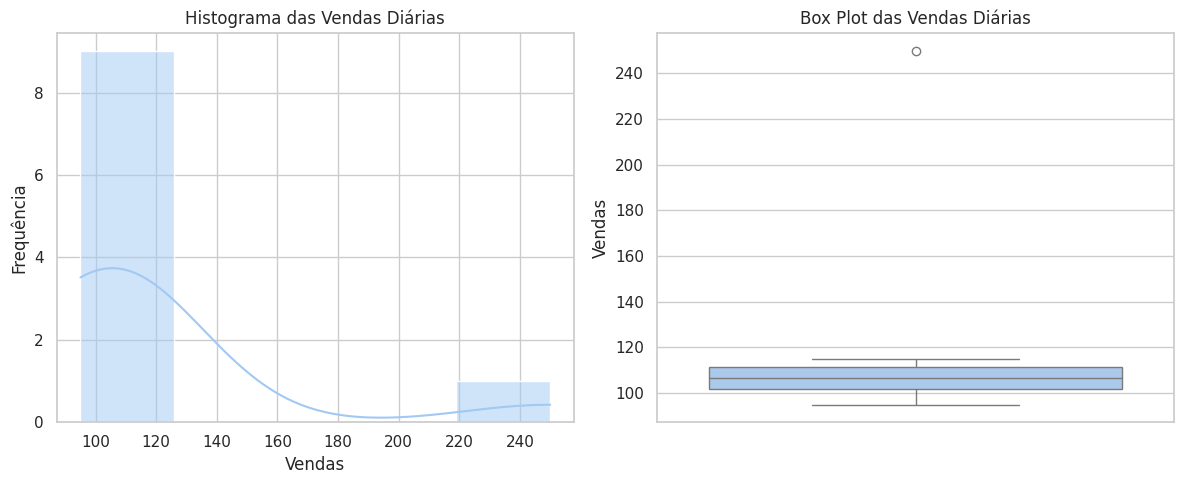

In [19]:
# --- Bloco de Código Adicional: Visualização Descritiva Rápida ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(vendas, kde=True, bins=5) # bins=5 para agrupar mais
plt.title('Histograma das Vendas Diárias')
plt.xlabel('Vendas')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.boxplot(y=vendas)
plt.title('Box Plot das Vendas Diárias')
plt.ylabel('Vendas')

plt.tight_layout()
plt.show()
# Os gráficos ajudam a visualizar a distribuição e o outlier.
# --- Fim Bloco de Código Adicional ---

**3. Estatísticas Inferenciais: Fazendo Inferências a Partir de Dados**

A estatística inferencial é um ramo da estatística que utiliza dados de amostras para fazer inferências ou previsões sobre uma população maior. Em vez de analisar todos os elementos de uma população, o que muitas vezes é impraticável ou impossível, a estatística inferencial permite que as empresas tirem conclusões que vão além dos dados imediatos disponíveis. Isso é fundamental para a pesquisa de mercado, previsão de vendas e avaliação da eficácia de intervenções. O principal objetivo da estatística inferencial nos negócios é estimar valores de parâmetros populacionais desconhecidos utilizando dados amostrais.

**3.1 Teste de Hipóteses**

O teste de hipóteses é um procedimento formal utilizado na estatística inferencial para determinar se há evidências suficientes em uma amostra de dados para rejeitar uma afirmação sobre uma população. Este processo envolve a formulação de duas hipóteses: a hipótese nula (H0) e a hipótese alternativa (H1). A hipótese nula geralmente representa uma afirmação de "não efeito" ou "não diferença", enquanto a hipótese alternativa contradiz a hipótese nula. Por exemplo, a hipótese nula pode ser que uma nova campanha de marketing não teve impacto nas vendas, enquanto a hipótese alternativa seria que ela teve um impacto. O teste de hipóteses permite que as empresas validem suposições e determinem se os efeitos observados são estatisticamente significativos ou apenas resultado do acaso.

Exemplo: Uma empresa deseja comparar o desempenho de duas estratégias de marketing diferentes (A e B) em termos de taxas de conversão médias.

Hipótese Nula (H0): Não há diferença significativa nas taxas de conversão médias entre as estratégias A e B (μ_A = μ_B).
Hipótese Alternativa (H1): Há uma diferença significativa nas taxas de conversão médias entre as estratégias A e B (μ_A ≠ μ_B).

<ipython-input-20-aa3912605ad3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_conversao, x='Estrategia', y='Taxa', palette='Set2')


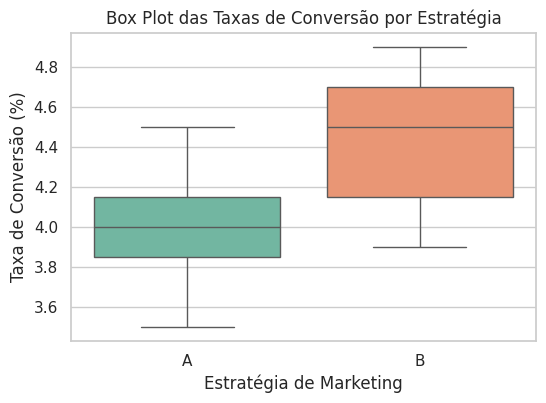


Teste de Levene para Variâncias: p-valor = 0.531

--- Teste T (Variâncias Iguais = True) ---
Média A: 4.00, Média B: 4.43
Estatística t: -2.29
Valor p: 0.041
Como p (0.041) < alpha (0.05), rejeitamos a hipótese nula.
Há evidências de uma diferença significativa nas taxas de conversão entre as estratégias A e B.


In [20]:
# --- Bloco de Código Adicional: Visualização antes do Teste T ---
import matplotlib.pyplot as plt
import seaborn as sns

taxas_conversao_A = np.array([3.5, 4.1, 3.8, 4.5, 4.0, 3.9, 4.2]) # Adicionado mais dados
taxas_conversao_B = np.array([3.9, 4.3, 4.0, 4.8, 4.5, 4.6, 4.9]) # Adicionado mais dados

# Criar um DataFrame para facilitar a visualização com Seaborn
df_conversao = pd.DataFrame({
    'Taxa': np.concatenate([taxas_conversao_A, taxas_conversao_B]),
    'Estrategia': ['A'] * len(taxas_conversao_A) + ['B'] * len(taxas_conversao_B)
})

plt.figure(figsize=(6, 4))
sns.boxplot(data=df_conversao, x='Estrategia', y='Taxa', palette='Set2')
plt.title('Box Plot das Taxas de Conversão por Estratégia')
plt.xlabel('Estratégia de Marketing')
plt.ylabel('Taxa de Conversão (%)')
plt.show()
# O Box Plot sugere visualmente que a Estratégia B pode ter taxas ligeiramente maiores.
# --- Fim Bloco de Código Adicional ---

from scipy import stats
import numpy as np

# Dados hipotéticos de taxas de conversão para as estratégias A e B (em porcentagem)
# Usando os dados aumentados do bloco anterior
# taxas_conversao_A = np.array([3.5, 4.1, 3.8, 4.5, 4.0, 3.9, 4.2])
# taxas_conversao_B = np.array([3.9, 4.3, 4.0, 4.8, 4.5, 4.6, 4.9])

# Realizar um teste t independente para comparar as médias das duas amostras
# Verificar igualdade de variâncias (Teste de Levene)
stat_levene, p_levene = stats.levene(taxas_conversao_A, taxas_conversao_B)
print(f"\nTeste de Levene para Variâncias: p-valor = {p_levene:.3f}")
equal_var_flag = p_levene > 0.05 # Assume variâncias iguais se p > 0.05

teste_t = stats.ttest_ind(taxas_conversao_A, taxas_conversao_B, equal_var=equal_var_flag)

print(f"\n--- Teste T (Variâncias Iguais = {equal_var_flag}) ---")
print(f"Média A: {np.mean(taxas_conversao_A):.2f}, Média B: {np.mean(taxas_conversao_B):.2f}")
print(f"Estatística t: {teste_t.statistic:.2f}")
print(f"Valor p: {teste_t.pvalue:.3f}")

# Interpretação do valor p
alpha = 0.05  # Nível de significância
if teste_t.pvalue < alpha:
    print(f"Como p ({teste_t.pvalue:.3f}) < alpha ({alpha}), rejeitamos a hipótese nula.")
    print("Há evidências de uma diferença significativa nas taxas de conversão entre as estratégias A e B.")
else:
    print(f"Como p ({teste_t.pvalue:.3f}) >= alpha ({alpha}), não rejeitamos a hipótese nula.")
    print("Não há evidências suficientes para concluir que há uma diferença significativa nas taxas de conversão.")

Neste exemplo, o valor p obtido do teste t indica a probabilidade de observar os dados (ou dados mais extremos) se a hipótese nula fosse verdadeira. Se o valor p for menor que um nível de significância predefinido (geralmente 0.05), rejeitamos a hipótese nula, concluindo que há uma diferença significativa entre as médias das duas amostras.

**4. Dados Qualitativos e Quantitativos: Tipos e Análise em Negócios**

Os dados utilizados em análises estatísticas podem ser classificados em dois tipos principais: qualitativos e quantitativos. Ambos os tipos de dados são cruciais e complementares na análise de dados de negócios.

**4.1 Dados Qualitativos**

Dados qualitativos são informações descritivas que capturam qualidades ou características não numéricas. Eles ajudam a compreender percepções, sentimentos, opiniões e comportamentos de um público. Exemplos relevantes para negócios incluem feedback de clientes, transcrições de entrevistas, respostas abertas de pesquisas e discussões em grupos focais. Os dados qualitativos são frequentemente utilizados para formular hipóteses, fornecendo insights sobre problemas, insatisfações e o que os clientes valorizam. Por exemplo, ao coletar opiniões abertas sobre um produto, uma empresa pode identificar problemas como preço ou funcionalidade. A análise de dados qualitativos envolve a identificação de padrões e temas recorrentes nas respostas dos clientes, com ferramentas de análise de texto auxiliando na transformação de feedbacks em insights acionáveis. Métodos comuns de análise incluem análise de conteúdo, análise de discurso e análise temática.

Exemplo de cenário: Uma empresa de software realiza entrevistas com usuários para entender suas experiências com um novo aplicativo. As respostas são dados qualitativos que podem ser analisados para identificar os principais pontos fortes e fracos do aplicativo, bem como as necessidades e desejos dos usuários.

In [21]:
import pandas as pd

# Exemplo de dados qualitativos: feedback de clientes sobre um produto
feedback_lista = [
    "O produto é fácil de usar e intuitivo.",
    "Achei o preço um pouco alto.",
    "Gostaria que tivesse mais funcionalidades, como integração X.",
    "O suporte ao cliente foi excelente e rápido.",
    "O produto atendeu às minhas expectativas, mas a interface poderia ser melhor.",
    "Preço alto comparado aos concorrentes.",
    "Fácil de configurar inicialmente.",
    "O suporte demorou para responder meu email.",
    "Adorei a funcionalidade de relatório!"
]
feedback = pd.Series(feedback_lista, name="Feedback")

print("Feedback dos clientes:\n", feedback)

# --- Bloco de Código Adicional: Análise Qualitativa Simples ---
# Contagem de palavras chave (exemplo muito básico)
contagem_preco = feedback.str.contains('preço|alto', case=False).sum()
contagem_facil = feedback.str.contains('fácil|facil', case=False).sum()
contagem_suporte = feedback.str.contains('suporte', case=False).sum()
contagem_funcionalidade = feedback.str.contains('funcionalidade|integração', case=False).sum()

print("\nContagem de menções (exemplo):")
print(f"- Preço/Alto: {contagem_preco}")
print(f"- Fácil: {contagem_facil}")
print(f"- Suporte: {contagem_suporte}")
print(f"- Funcionalidade/Integração: {contagem_funcionalidade}")
# Ferramentas mais avançadas (NLP) são necessárias para análise profunda.
# --- Fim Bloco de Código Adicional ---

Feedback dos clientes:
 0               O produto é fácil de usar e intuitivo.
1                         Achei o preço um pouco alto.
2    Gostaria que tivesse mais funcionalidades, com...
3         O suporte ao cliente foi excelente e rápido.
4    O produto atendeu às minhas expectativas, mas ...
5               Preço alto comparado aos concorrentes.
6                    Fácil de configurar inicialmente.
7          O suporte demorou para responder meu email.
8                Adorei a funcionalidade de relatório!
Name: Feedback, dtype: object

Contagem de menções (exemplo):
- Preço/Alto: 2
- Fácil: 2
- Suporte: 2
- Funcionalidade/Integração: 2


**4.2 Dados Quantitativos**

Dados quantitativos são definidos como qualquer conjunto de dados que possua um valor mensurável e possa ser contado objetivamente. Eles são expressos numericamente e representam valores contáveis (discretos) ou que podem assumir qualquer valor dentro de um intervalo (contínuos). Exemplos comuns em negócios incluem números de vendas, tráfego de websites, dados financeiros e resultados de pesquisas com escalas de avaliação numérica. Os dados quantitativos são usados para confirmar hipóteses e buscar respostas gerais, permitindo quantificar a relevância de um problema para a base de clientes. Por exemplo, uma pesquisa quantitativa pode revelar que 60% dos clientes estão insatisfeitos com a relação quantidade-custo de um produto, confirmando a hipótese levantada pela pesquisa qualitativa. A análise de dados quantitativos frequentemente envolve o cálculo de estatísticas descritivas, a realização de testes de hipóteses e a construção de modelos preditivos.

Exemplo de cenário: Uma loja online coleta dados sobre o número de visitas ao seu website diariamente e o valor total das vendas realizadas. Esses dados quantitativos podem ser analisados para identificar tendências de vendas ao longo do tempo ou para avaliar o impacto de campanhas de marketing no tráfego e nas vendas.

Dados de vendas:
             Vendas  Visitas
Data                       
2024-07-01    1500      300
2024-07-02    1750      350
2024-07-03    1600      320
2024-07-04    1800      380
2024-07-05    1950      400
2024-07-06    2100      450
2024-07-07    2050      430

Estatísticas Descritivas (Vendas e Visitas):
             Vendas     Visitas
count     7.000000    7.000000
mean   1821.428571  375.714286
std     225.198325   55.634864
min    1500.000000  300.000000
25%    1675.000000  335.000000
50%    1800.000000  380.000000
75%    2000.000000  415.000000
max    2100.000000  450.000000


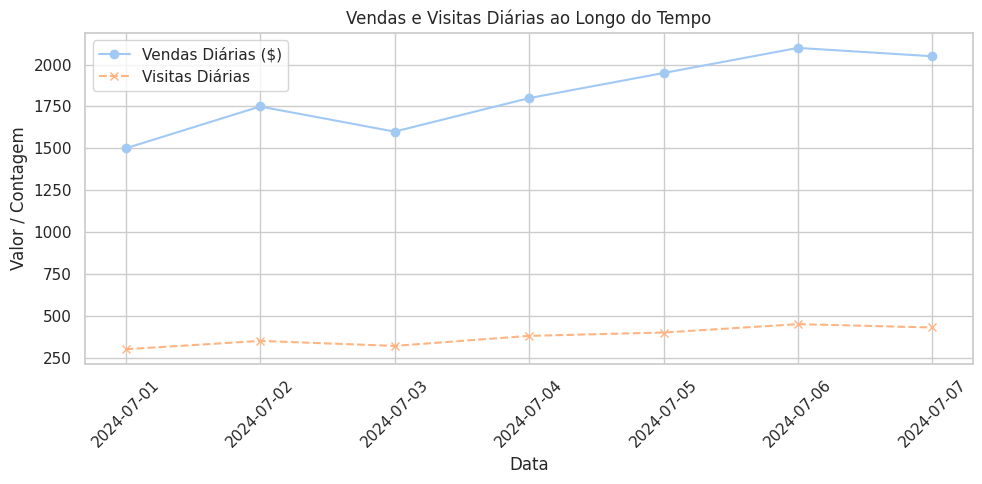

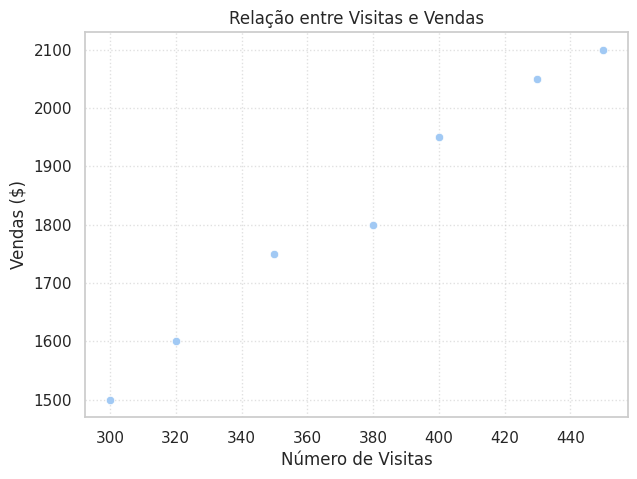

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de dados quantitativos: vendas diárias e visitas ao website
dados_vendas = {'Data': pd.to_datetime(['2024-07-01', '2024-07-02', '2024-07-03', '2024-07-04', '2024-07-05', '2024-07-06', '2024-07-07']),
                'Vendas': [1500, 1750, 1600, 1800, 1950, 2100, 2050], # Dados preenchidos
                'Visitas': [300, 350, 320, 380, 400, 450, 430]} # Dados preenchidos
df_vendas = pd.DataFrame(dados_vendas)
df_vendas.set_index('Data', inplace=True) # Define a coluna Data como índice

print("Dados de vendas:\n", df_vendas)

# --- Bloco de Código Adicional: Análise Quantitativa Simples ---
print("\nEstatísticas Descritivas (Vendas e Visitas):\n", df_vendas.describe())

# Visualização de Tendências
plt.figure(figsize=(10, 5))
plt.plot(df_vendas.index, df_vendas['Vendas'], marker='o', linestyle='-', label='Vendas Diárias ($)')
plt.plot(df_vendas.index, df_vendas['Visitas'], marker='x', linestyle='--', label='Visitas Diárias')
plt.title('Vendas e Visitas Diárias ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor / Contagem')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relação entre Visitas e Vendas
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_vendas, x='Visitas', y='Vendas')
plt.title('Relação entre Visitas e Vendas')
plt.xlabel('Número de Visitas')
plt.ylabel('Vendas ($)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()
# --- Fim Bloco de Código Adicional ---

A integração de dados qualitativos e quantitativos proporciona uma visão mais completa dos desafios e oportunidades de negócios. A pesquisa qualitativa geralmente precede a quantitativa, ajudando a refinar as perguntas e a entender o contexto antes de buscar números concretos.

**5. Técnicas de Amostragem: Selecionando Dados Representativos**

Em muitas situações de negócios, coletar dados de toda a população de interesse é impraticável. As técnicas de amostragem permitem selecionar um subconjunto representativo da população (a amostra) para realizar análises e tirar conclusões sobre toda a população. A escolha da técnica de amostragem adequada é crucial para garantir que a amostra reflita com precisão as características da população, assegurando a validade das inferências estatísticas.

Existem diversas técnicas de amostragem, sendo algumas das mais comuns em pesquisas de negócios:

* **Amostragem Aleatória Simples:** Cada membro da população tem a mesma probabilidade de ser selecionado para a amostra. É como tirar nomes de um chapéu. Essa técnica é apropriada quando a população é homogênea. Por exemplo, selecionar aleatoriamente clientes de um banco de dados para uma pesquisa de satisfação geral.
* **Amostragem Estratificada:** A população é dividida em subgrupos (estratos) com base em características relevantes (por exemplo, idade, renda, região geográfica), e uma amostra aleatória simples é então retirada de cada estrato. Essa técnica garante que todos os subgrupos importantes sejam representados na amostra de forma proporcional. Por exemplo, em uma pesquisa de mercado, pode-se estratificar a amostra por faixas de renda para garantir a inclusão de consumidores de diferentes níveis econômicos.
* **Amostragem por Conglomerados (Clusters):** A população é dividida em grupos ou aglomerados (por exemplo, bairros, escolas, empresas), e uma amostra aleatória de aglomerados é selecionada. Todos os membros dos aglomerados selecionados são incluídos na amostra. Essa técnica é útil quando a população está naturalmente agrupada e é difícil obter uma lista completa de todos os indivíduos. Por exemplo, para pesquisar pequenas empresas em uma cidade, pode-se selecionar aleatoriamente alguns bairros (os aglomerados) e entrevistar todas as empresas nesses bairros.

In [23]:
# --- Bloco de Código Adicional: Exemplos de Amostragem ---
# Criar um DataFrame populacional maior para exemplo
np.random.seed(101)
populacao_data = {
    'ID': range(1, 1001),
    'Idade': np.random.randint(18, 70, size=1000),
    'Regiao': np.random.choice(['Norte', 'Sul', 'Leste', 'Oeste'], size=1000, p=[0.2, 0.3, 0.35, 0.15]),
    'Gasto_Anual': np.random.normal(loc=1500, scale=400, size=1000).clip(min=100)
}
df_populacao = pd.DataFrame(populacao_data)
print("\n--- Técnicas de Amostragem ---")
print(f"Tamanho da População: {len(df_populacao)}")

# 1. Amostragem Aleatória Simples (Simple Random Sampling)
tamanho_amostra_simples = 100
amostra_simples = df_populacao.sample(n=tamanho_amostra_simples, random_state=42) # random_state para reprodutibilidade
print(f"\nTamanho da Amostra Simples: {len(amostra_simples)}")
print("Distribuição de Região na Amostra Simples:\n", amostra_simples['Regiao'].value_counts(normalize=True))
print("Distribuição de Região na População:\n", df_populacao['Regiao'].value_counts(normalize=True)) # Comparar

# 2. Amostragem Estratificada (Stratified Sampling)
# Queremos uma amostra de 100, mantendo a proporção das regiões da população
# Usando scikit-learn para facilitar (poderia ser feito manualmente com groupby)
from sklearn.model_selection import train_test_split

# Precisamos de um 'y' para estratificar, usamos a própria coluna de estratificação
# 'train_test_split' não é para treino/teste aqui, mas para amostragem estratificada
# Pegamos o 'test_set' como nossa amostra estratificada (definindo test_size apropriado)
proporcao_amostra = 100 / len(df_populacao)
_, amostra_estratificada = train_test_split(
    df_populacao,
    test_size=proporcao_amostra,
    stratify=df_populacao['Regiao'], # Coluna para estratificação
    random_state=42
)
print(f"\nTamanho da Amostra Estratificada: {len(amostra_estratificada)}")
print("Distribuição de Região na Amostra Estratificada:\n", amostra_estratificada['Regiao'].value_counts(normalize=True))
# A distribuição na amostra estratificada deve ser muito mais próxima da população.

# 3. Amostragem por Conglomerado (Cluster Sampling) - Exemplo Conceitual
# Suponha que 'Regiao' seja nosso conglomerado. Selecionamos aleatoriamente algumas regiões.
regioes_selecionadas = np.random.choice(df_populacao['Regiao'].unique(), size=2, replace=False) # Escolhe 2 regiões aleatoriamente
amostra_cluster = df_populacao[df_populacao['Regiao'].isin(regioes_selecionadas)]
print(f"\nRegiões Selecionadas (Cluster): {list(regioes_selecionadas)}")
print(f"Tamanho da Amostra por Cluster: {len(amostra_cluster)}")
# Cuidado: esta amostra não é necessariamente representativa da população inteira em outras características.
# --- Fim Bloco de Código Adicional ---


--- Técnicas de Amostragem ---
Tamanho da População: 1000

Tamanho da Amostra Simples: 100
Distribuição de Região na Amostra Simples:
 Regiao
Leste    0.41
Sul      0.32
Norte    0.15
Oeste    0.12
Name: proportion, dtype: float64
Distribuição de Região na População:
 Regiao
Leste    0.353
Sul      0.306
Norte    0.196
Oeste    0.145
Name: proportion, dtype: float64

Tamanho da Amostra Estratificada: 100
Distribuição de Região na Amostra Estratificada:
 Regiao
Leste    0.35
Sul      0.31
Norte    0.20
Oeste    0.14
Name: proportion, dtype: float64

Regiões Selecionadas (Cluster): ['Sul', 'Oeste']
Tamanho da Amostra por Cluster: 451


A escolha da técnica de amostragem depende dos objetivos da pesquisa, das características da população e dos recursos disponíveis. Uma amostra bem selecionada permite que as empresas façam inferências confiáveis sobre a população com base em uma quantidade menor de dados.

**6. Análise Descritiva: Sumarizando e Visualizando Dados**

A análise descritiva é a etapa inicial da análise de dados e envolve o uso de estatísticas descritivas para resumir as principais características de um conjunto de dados. Ela ajuda a organizar, interpretar e apresentar os dados de forma significativa, facilitando a identificação de padrões, anomalias e tendências. A análise descritiva é essencial para a tomada de decisões informadas em diversas áreas de negócios, como planejamento financeiro, monitoramento de processos industriais e marketing.

Em relatórios de vendas, por exemplo, a análise descritiva pode envolver o cálculo da média de vendas por região, a identificação dos produtos mais vendidos e a análise da distribuição das vendas entre diferentes segmentos de clientes. No contexto de desempenho de marketing, pode-se resumir o tráfego do website por fonte, calcular as taxas de conversão para diferentes campanhas e analisar as métricas de engajamento do cliente.

A visualização de dados desempenha um papel crucial na análise descritiva, pois permite apresentar informações complexas de forma clara e intuitiva. Gráficos como gráficos de barras (para comparar quantidades entre categorias), gráficos de setores (para mostrar proporções), gráficos de linhas (para observar o comportamento ao longo do tempo), histogramas (para visualizar a distribuição de dados quantitativos) e box plots (para resumir a distribuição e identificar outliers) são ferramentas poderosas para comunicar insights de forma eficaz.


--- Análise Descritiva (População Exemplo) ---
Sumário Descritivo Completo:
                  ID        Idade Regiao  Gasto_Anual
count   1000.000000  1000.000000   1000  1000.000000
unique          NaN          NaN      4          NaN
top             NaN          NaN  Leste          NaN
freq            NaN          NaN    353          NaN
mean     500.500000    43.514000    NaN  1506.922508
std      288.819436    15.120199    NaN   385.694894
min        1.000000    18.000000    NaN   320.331337
25%      250.750000    30.000000    NaN  1257.427258
50%      500.500000    43.000000    NaN  1506.628396
75%      750.250000    57.000000    NaN  1773.095138
max     1000.000000    69.000000    NaN  2703.837202

Análise da Coluna 'Regiao':
Contagem por Região:
 Regiao
Leste    353
Sul      306
Norte    196
Oeste    145
Name: count, dtype: int64

Percentual por Região:
 Regiao
Leste    35.3
Sul      30.6
Norte    19.6
Oeste    14.5
Name: proportion, dtype: float64


<ipython-input-24-bee86755f4c5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_populacao, x='Regiao', order=contagem_regiao.index, palette='viridis')


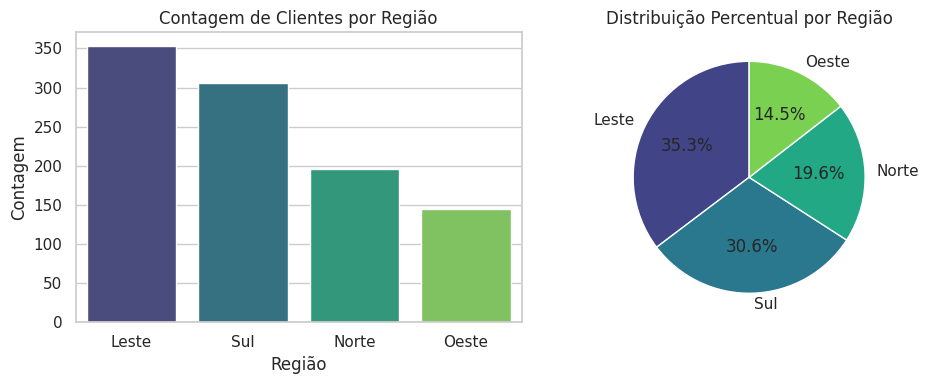


Análise da Coluna 'Gasto_Anual':
Média Gasto: 1506.92
Mediana Gasto: 1506.63
Desvio Padrão Gasto: 385.69


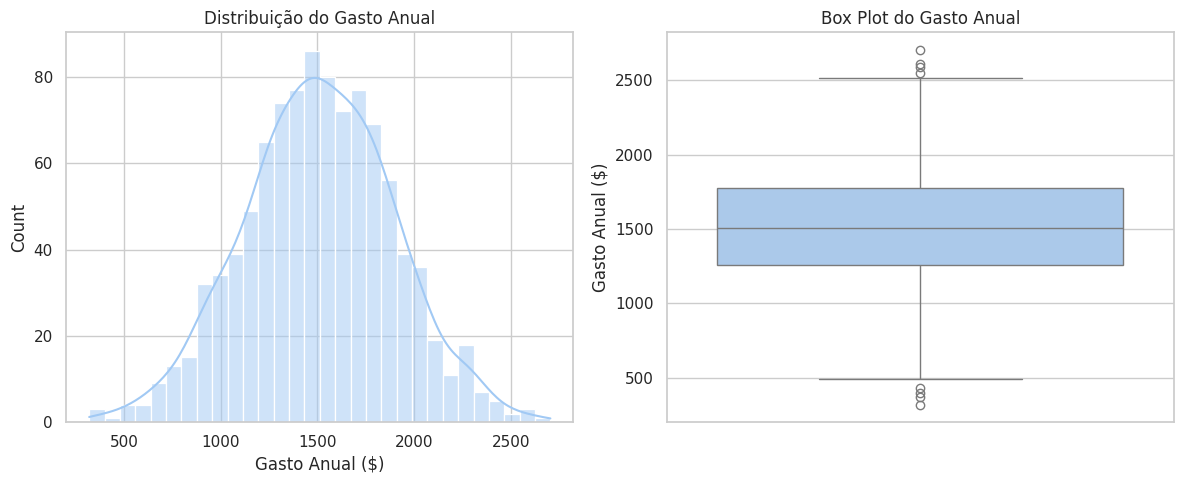

<ipython-input-24-bee86755f4c5>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_populacao, x='Regiao', y='Gasto_Anual', palette='viridis')


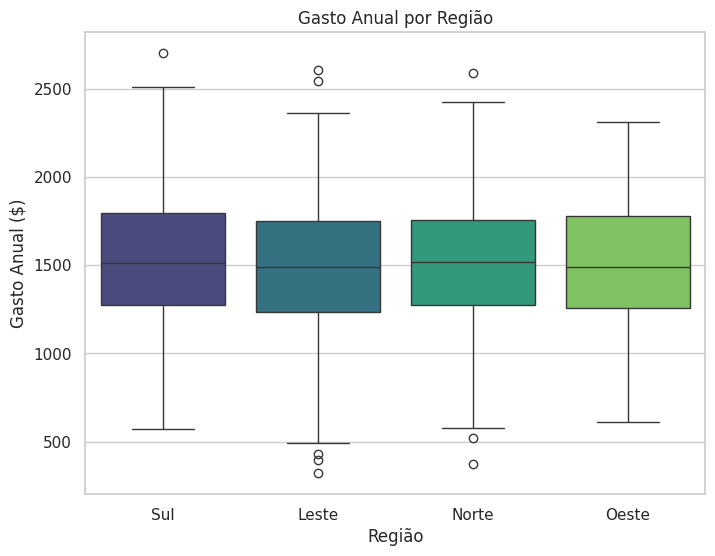

In [24]:
# --- Bloco de Código Adicional: Análise Descritiva Abrangente ---
# Usando o DataFrame da população criado na seção de amostragem
print("\n--- Análise Descritiva (População Exemplo) ---")

# Sumário estatístico completo com describe()
# include='all' mostra estatísticas para colunas numéricas e categóricas/objeto
print("Sumário Descritivo Completo:\n", df_populacao.describe(include='all'))

# Análise de uma variável categórica ('Regiao')
print("\nAnálise da Coluna 'Regiao':")
contagem_regiao = df_populacao['Regiao'].value_counts()
percentual_regiao = df_populacao['Regiao'].value_counts(normalize=True) * 100
print("Contagem por Região:\n", contagem_regiao)
print("\nPercentual por Região:\n", percentual_regiao.round(2))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=df_populacao, x='Regiao', order=contagem_regiao.index, palette='viridis')
plt.title('Contagem de Clientes por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
plt.pie(contagem_regiao, labels=contagem_regiao.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(contagem_regiao)))
plt.title('Distribuição Percentual por Região')
plt.ylabel('') # Remove o label y do pie chart

plt.tight_layout()
plt.show()

# Análise de uma variável numérica ('Gasto_Anual')
print("\nAnálise da Coluna 'Gasto_Anual':")
print(f"Média Gasto: {df_populacao['Gasto_Anual'].mean():.2f}")
print(f"Mediana Gasto: {df_populacao['Gasto_Anual'].median():.2f}")
print(f"Desvio Padrão Gasto: {df_populacao['Gasto_Anual'].std():.2f}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_populacao['Gasto_Anual'], kde=True, bins=30)
plt.title('Distribuição do Gasto Anual')
plt.xlabel('Gasto Anual ($)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df_populacao['Gasto_Anual'])
plt.title('Box Plot do Gasto Anual')
plt.ylabel('Gasto Anual ($)')

plt.tight_layout()
plt.show()

# Análise Bivariada (Ex: Gasto Anual por Região)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_populacao, x='Regiao', y='Gasto_Anual', palette='viridis')
plt.title('Gasto Anual por Região')
plt.xlabel('Região')
plt.ylabel('Gasto Anual ($)')
plt.show()

# Pairplot para visão geral das relações numéricas (pode ser lento para muitos dados/colunas)
# sns.pairplot(df_populacao[['Idade', 'Gasto_Anual']]) # Seleciona colunas numéricas
# plt.suptitle('Pair Plot das Variáveis Numéricas', y=1.02)
# plt.show()
# --- Fim Bloco de Código Adicional ---

**Tabela 1: Estatísticas Descritivas Comuns e suas Aplicações em Negócios**

| Estatística       | Definição                             | Aplicação em Negócios                               |
| :--------------- | :------------------------------------------- | :--------------------------------------------------------- |
| Média            | Valor médio                           | Vendas médias, gasto médio do cliente                      |
| Mediana          | Valor do meio                           | Gasto típico do cliente, salário típico                       |
| Moda             | Valor mais frequente                    | Produto mais popular, faixa etária mais comum de clientes |
| Alcance          | Diferença entre o máximo e o mínimo     | Variabilidade de preços, amplitude de idades dos clientes |
| IQR              | Dispersão dos 50% centrais dos dados    | Entendimento da distribuição central dos dados              |
| Desvio Padrão    | Desvio médio em relação à média         | Consistência dos tempos de entrega, variabilidade dos custos |
| Variância        | Média dos quadrados das diferenças da média | Medida da dispersão dos dados                              |

**7. Probabilidade: Entendendo a Incerteza nos Negócios**

A probabilidade é um conceito fundamental para entender e quantificar a incerteza em eventos de negócios. Ela fornece uma maneira de medir a chance de um evento específico ocorrer.

**7.1 Regras Básicas de Probabilidade**

* **Regra da Adição:** Para dois eventos mutuamente exclusivos (que não podem ocorrer ao mesmo tempo), a probabilidade de ocorrência de um ou outro evento é a soma de suas probabilidades individuais. Por exemplo, a probabilidade de um cliente comprar o produto A ou o produto B, se ele só pode comprar um deles. Se P(A) = 0.2 e P(B) = 0.3, então P(A ou B) = P(A) + P(B) = 0.2 + 0.3 = 0.5.
* **Eventos Independentes:** Dois eventos são independentes se a ocorrência de um não afeta a **probabilidade** de ocorrência do outro. A probabilidade de ambos os eventos ocorrerem é o produto de suas probabilidades individuais. Por exemplo, a probabilidade de dois vendedores fecharem um negócio independentemente. Se a probabilidade do vendedor 1 fechar um negócio é 0.4 e do vendedor 2 é 0.5, então a probabilidade de ambos fecharem um negócio é P(Vendedor 1 fecha) \* P(Vendedor 2 fecha) = 0.4 \* 0.5 = 0.2.
* **Probabilidade Condicional:** A probabilidade de um evento A ocorrer, dado que outro evento B já ocorreu, é chamada de probabilidade condicional e é denotada por P(A|B). É calculada como P(A|B) = P(A e B) / P(B). Por exemplo, a probabilidade de um cliente fazer uma segunda compra, dado que ele já fez uma primeira compra.

In [25]:
import numpy as np

# Exemplo de probabilidade condicional
# Probabilidade de um cliente fazer uma compra inicial (Evento B)
prob_compra_inicial = 0.3
# Probabilidade de um cliente fazer uma compra inicial E uma segunda compra (Evento A e B)
prob_compra_inicial_e_segunda = 0.18

# Probabilidade de um cliente fazer uma segunda compra dado que fez uma inicial (P(A|B))
# Verifica se prob_compra_inicial é maior que zero para evitar divisão por zero
if prob_compra_inicial > 0:
    prob_segunda_compra_dado_inicial = prob_compra_inicial_e_segunda / prob_compra_inicial
    print(f"Probabilidade de uma segunda compra dado uma compra inicial: {prob_segunda_compra_dado_inicial:.2f}")
else:
    print("Probabilidade da compra inicial é zero, não é possível calcular a probabilidade condicional.")


# --- Bloco de Código Adicional: Simulação Eventos Independentes ---
# Simular o fechamento de negócios por dois vendedores independentes
p_vendedor1 = 0.4
p_vendedor2 = 0.5
num_simulacoes = 10000
vendedor1_fecha = np.random.rand(num_simulacoes) < p_vendedor1
vendedor2_fecha = np.random.rand(num_simulacoes) < p_vendedor2

ambos_fecham = np.sum(vendedor1_fecha & vendedor2_fecha)
prob_ambos_simulada = ambos_fecham / num_simulacoes

print(f"\nSimulação de Eventos Independentes ({num_simulacoes} tentativas):")
print(f"- Probabilidade Teórica (Ambos Fecham): {p_vendedor1 * p_vendedor2:.3f}")
print(f"- Probabilidade Simulada (Ambos Fecham): {prob_ambos_simulada:.3f}")
# --- Fim Bloco de Código Adicional ---

Probabilidade de uma segunda compra dado uma compra inicial: 0.60

Simulação de Eventos Independentes (10000 tentativas):
- Probabilidade Teórica (Ambos Fecham): 0.200
- Probabilidade Simulada (Ambos Fecham): 0.202


**8. Distribuição de Probabilidades: Modelando Fenômenos de Negócios**

Uma distribuição de probabilidades é uma função que descreve a probabilidade de cada possível valor de uma variável aleatória. Diferentes distribuições são adequadas para modelar diferentes tipos de fenômenos de negócios.

**8.1 Distribuição Binomial**

A distribuição binomial modela a probabilidade de obter um certo número de sucessos em um número fixo de tentativas independentes, onde cada tentativa tem apenas dois resultados possíveis (sucesso ou falha) com uma probabilidade constante de sucesso. Por exemplo, modelar a probabilidade de um certo número de clientes responderem a uma campanha de marketing.

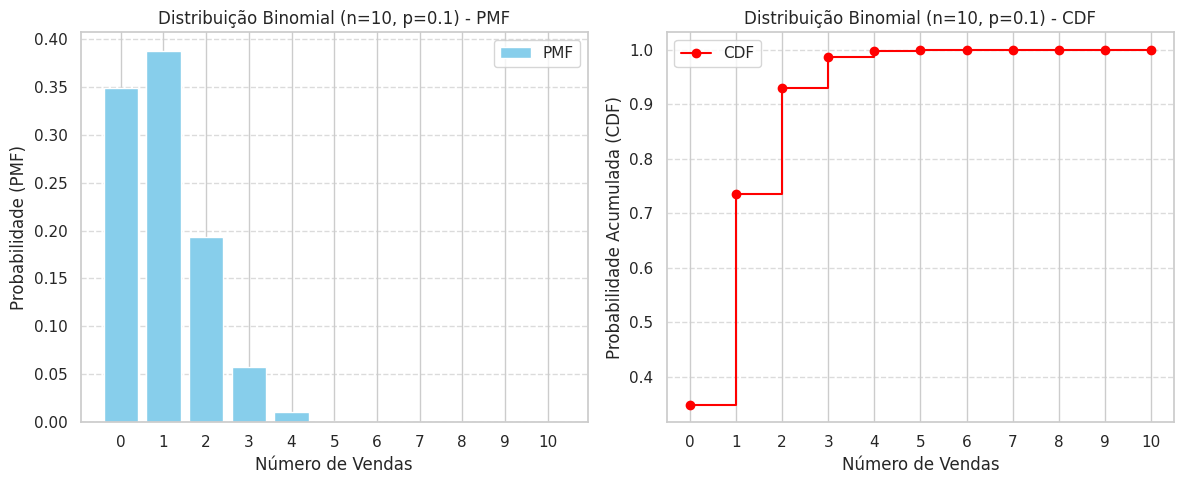

Probabilidade de fazer exatamente 2 vendas: 0.194
Probabilidade de fazer 2 ou menos vendas: 0.930
Probabilidade de fazer mais de 3 vendas: 0.013


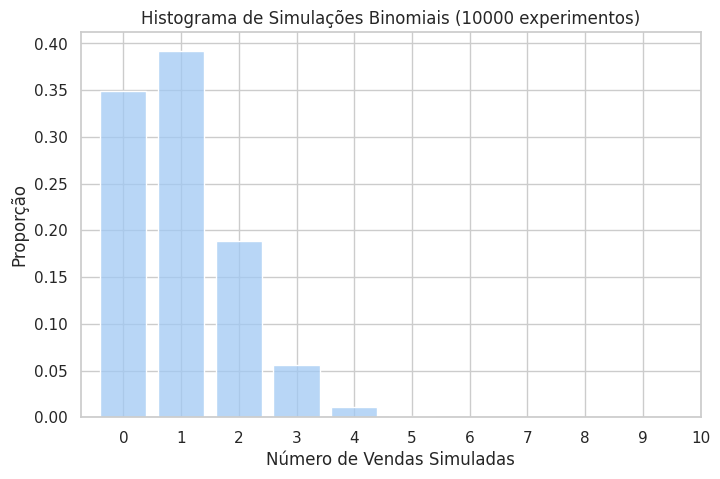

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parâmetros da distribuição binomial
n = 10  # Número de tentativas (por exemplo, 10 ligações de vendas)
p = 0.1  # Probabilidade de sucesso em cada tentativa (por exemplo, 10% de chance de fechar uma venda)
k = np.arange(0, n + 1) # Possíveis números de sucessos

# Calcular as probabilidades (PMF - Probability Mass Function)
probabilidades_pmf = binom.pmf(k, n, p)
# Calcular a probabilidade acumulada (CDF - Cumulative Distribution Function)
probabilidades_cdf = binom.cdf(k, n, p)

# Visualizar a distribuição PMF
plt.figure(figsize=(12, 5)) # Adiciona controle sobre o tamanho da figura

plt.subplot(1, 2, 1)
plt.bar(k, probabilidades_pmf, color='skyblue', label='PMF') # Muda a cor da barra
plt.xlabel('Número de Vendas')
plt.ylabel('Probabilidade (PMF)')
plt.title(f'Distribuição Binomial (n={n}, p={p}) - PMF') # Título mais específico
plt.xticks(k)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona transparência à grade
plt.legend()

# Visualizar a distribuição CDF
plt.subplot(1, 2, 2)
plt.step(k, probabilidades_cdf, color='red', marker='o', where='post', label='CDF') # Gráfico de degraus para CDF discreta
plt.xlabel('Número de Vendas')
plt.ylabel('Probabilidade Acumulada (CDF)')
plt.title(f'Distribuição Binomial (n={n}, p={p}) - CDF') # Título mais específico
plt.xticks(k)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona transparência à grade
plt.legend()

plt.tight_layout()
plt.show()

print(f"Probabilidade de fazer exatamente 2 vendas: {binom.pmf(2, n, p):.3f}")
print(f"Probabilidade de fazer 2 ou menos vendas: {binom.cdf(2, n, p):.3f}")
print(f"Probabilidade de fazer mais de 3 vendas: {1 - binom.cdf(3, n, p):.3f}") # P(X > 3) = 1 - P(X <= 3)

# --- Bloco de Código Adicional: Simulação Binomial ---
# Simular 10000 experimentos de 10 ligações cada
simulacoes_binomial = binom.rvs(n=n, p=p, size=10000)
plt.figure(figsize=(8, 5))
sns.histplot(simulacoes_binomial, discrete=True, stat='probability', shrink=0.8)
plt.title(f'Histograma de Simulações Binomiais ({10000} experimentos)')
plt.xlabel('Número de Vendas Simuladas')
plt.ylabel('Proporção')
plt.xticks(k)
plt.show()
# O histograma das simulações deve se assemelhar à forma da PMF teórica.
# --- Fim Bloco de Código Adicional ---

**8.2 Distribuição de Poisson**

A distribuição de Poisson modela o número de eventos que ocorrem em um intervalo de tempo ou espaço fixo, dado uma taxa média de ocorrência. É útil para modelar eventos raros que ocorrem independentemente. Por exemplo, modelar o número de clientes que chegam a uma loja em uma hora.

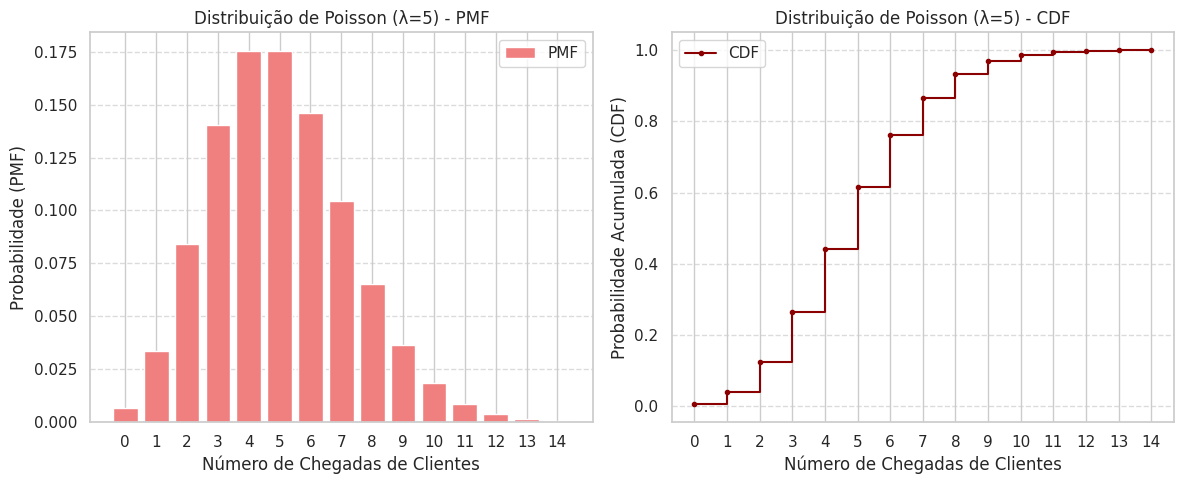


Probabilidade de exatamente 7 clientes chegarem em uma hora: 0.104
Probabilidade de 5 ou menos clientes chegarem: 0.616
Probabilidade de mais de 8 clientes chegarem: 0.068


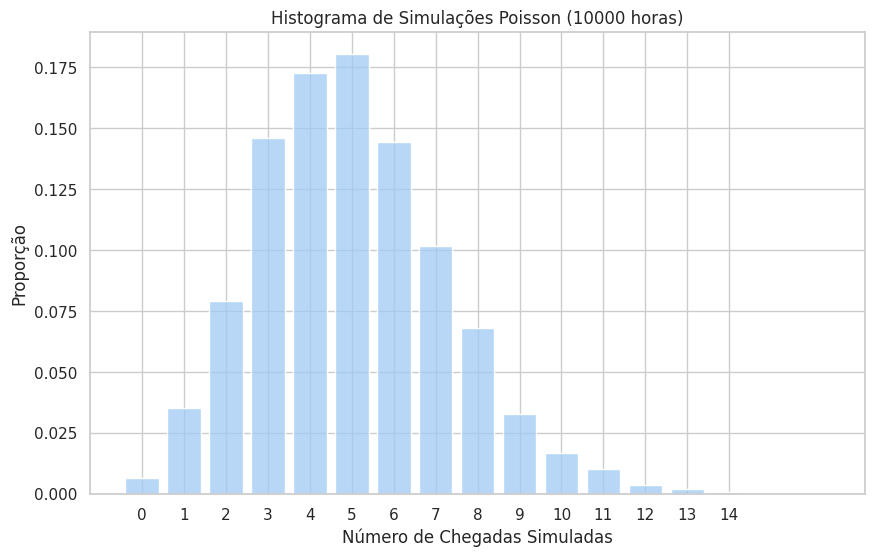

In [27]:
from scipy.stats import poisson

# Parâmetro da distribuição de Poisson
lambda_ = 5  # Taxa média de chegadas por hora

# Possíveis números de chegadas
k_poisson = np.arange(0, 15)

# Calcular as probabilidades (PMF)
probabilidades_poisson_pmf = poisson.pmf(k_poisson, lambda_)
# Calcular a probabilidade acumulada (CDF)
probabilidades_poisson_cdf = poisson.cdf(k_poisson, lambda_)

# Visualizar a distribuição PMF
plt.figure(figsize=(12, 5)) # Adiciona controle sobre o tamanho da figura

plt.subplot(1, 2, 1)
plt.bar(k_poisson, probabilidades_poisson_pmf, color='lightcoral', label='PMF') # Muda a cor da barra
plt.xlabel('Número de Chegadas de Clientes')
plt.ylabel('Probabilidade (PMF)')
plt.title(f'Distribuição de Poisson (λ={lambda_}) - PMF') # Título mais específico
plt.xticks(k_poisson)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona transparência à grade
plt.legend()

# Visualizar a distribuição CDF
plt.subplot(1, 2, 2)
plt.step(k_poisson, probabilidades_poisson_cdf, color='darkred', marker='.', where='post', label='CDF') # Gráfico de degraus para CDF discreta
plt.xlabel('Número de Chegadas de Clientes')
plt.ylabel('Probabilidade Acumulada (CDF)')
plt.title(f'Distribuição de Poisson (λ={lambda_}) - CDF') # Título mais específico
plt.xticks(k_poisson)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Adiciona transparência à grade
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nProbabilidade de exatamente 7 clientes chegarem em uma hora: {poisson.pmf(7, lambda_):.3f}")
print(f"Probabilidade de 5 ou menos clientes chegarem: {poisson.cdf(5, lambda_):.3f}")
print(f"Probabilidade de mais de 8 clientes chegarem: {1 - poisson.cdf(8, lambda_):.3f}")

# --- Bloco de Código Adicional: Simulação Poisson ---
# Simular 10000 horas e contar as chegadas em cada uma
simulacoes_poisson = poisson.rvs(mu=lambda_, size=10000)
plt.figure(figsize=(10, 6))
sns.histplot(simulacoes_poisson, discrete=True, stat='probability', shrink=0.8, bins=max(k_poisson)+1) # Garante bins suficientes
plt.title(f'Histograma de Simulações Poisson ({10000} horas)')
plt.xlabel('Número de Chegadas Simuladas')
plt.ylabel('Proporção')
plt.xticks(k_poisson)
plt.show()
# O histograma das simulações deve se assemelhar à forma da PMF teórica.
# --- Fim Bloco de Código Adicional ---

**8.3 Distribuição Normal**

A distribuição normal (ou Gaussiana) é uma das distribuições de probabilidade contínuas mais importantes em estatística. Muitos fenômenos naturais e de negócios podem ser modelados por uma distribuição normal, como pesos de produtos, alturas de clientes ou pontuações de testes. É caracterizada por sua forma de sino simétrica em torno da média.


Z-score para 480g: -1.00
Z-score para 520g: 1.00
Peso correspondente ao 90º percentil: 525.63g


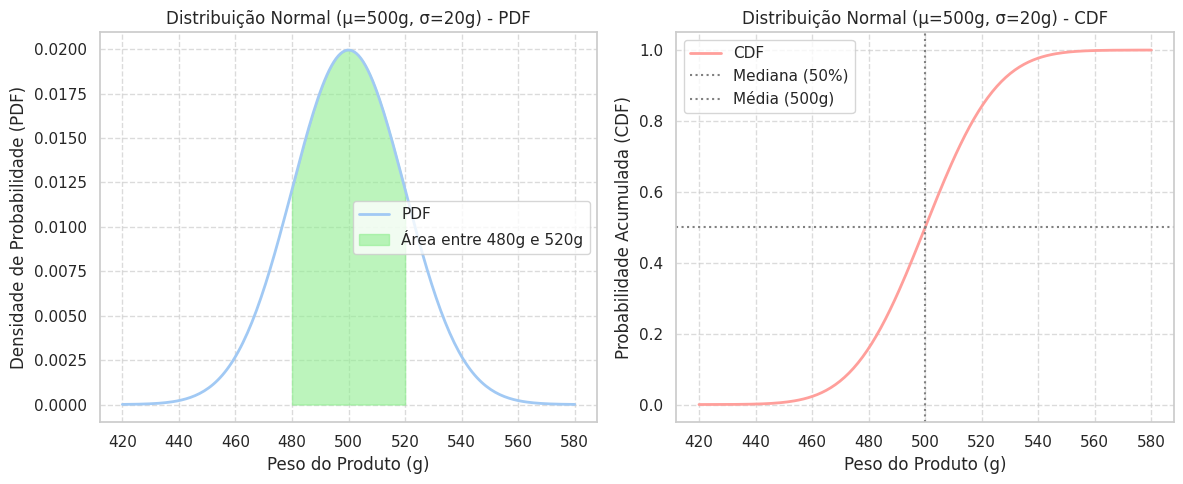


Probabilidade de um produto pesar entre 480g e 520g: 0.683


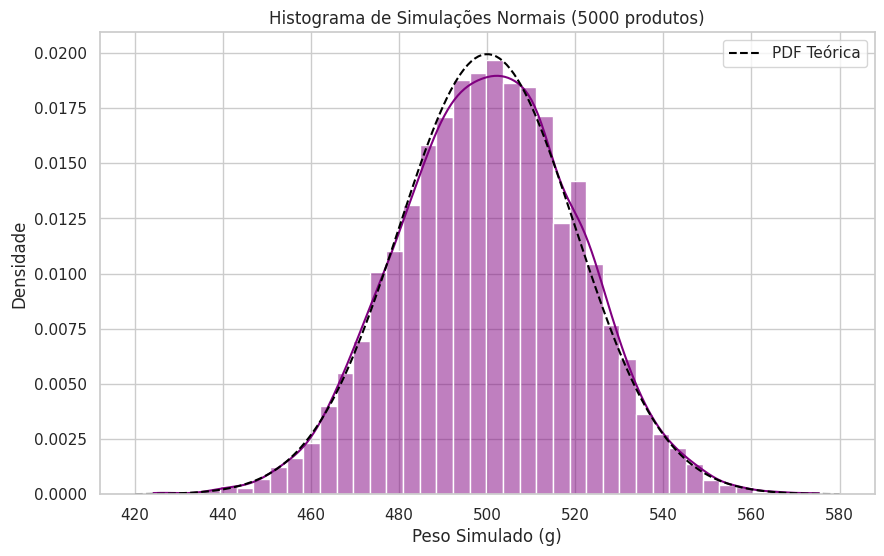

In [28]:
from scipy.stats import norm

# Parâmetros da distribuição normal
media = 500  # Média do peso do produto (em gramas)
desvio_padrao = 20  # Desvio padrão do peso do produto (em gramas)

# Intervalo de peso para calcular a probabilidade
limite_inferior = 480
limite_superior = 520

# Calcular a probabilidade usando a função de distribuição cumulativa (CDF)
probabilidade = norm.cdf(limite_superior, media, desvio_padrao) - norm.cdf(limite_inferior, media, desvio_padrao)

# Calcular o valor Z (quantos desvios padrão um valor está da média)
z_score_inf = (limite_inferior - media) / desvio_padrao
z_score_sup = (limite_superior - media) / desvio_padrao
print(f"\nZ-score para {limite_inferior}g: {z_score_inf:.2f}")
print(f"Z-score para {limite_superior}g: {z_score_sup:.2f}")

# Calcular valor correspondente a um percentil (PPF - Percent Point Function, inversa da CDF)
peso_percentil_90 = norm.ppf(0.90, loc=media, scale=desvio_padrao)
print(f"Peso correspondente ao 90º percentil: {peso_percentil_90:.2f}g")


# Gerar pontos para visualizar a distribuição PDF e CDF
x_norm_vis = np.linspace(media - 4 * desvio_padrao, media + 4 * desvio_padrao, 200) # Amplia o range e número de pontos
y_pdf = norm.pdf(x_norm_vis, media, desvio_padrao)
y_cdf = norm.cdf(x_norm_vis, media, desvio_padrao)

plt.figure(figsize=(12, 5)) # Adiciona controle sobre o tamanho da figura

plt.subplot(1, 2, 1)
plt.plot(x_norm_vis, y_pdf, 'b-', linewidth=2, label='PDF') # Muda cor e espessura da linha
# Destaca a área de interesse
x_fill = np.linspace(limite_inferior, limite_superior, 100)
y_fill = norm.pdf(x_fill, media, desvio_padrao)
plt.fill_between(x_fill, y_fill, color='lightgreen', alpha=0.6, label=f'Área entre {limite_inferior}g e {limite_superior}g')

plt.xlabel('Peso do Produto (g)')
plt.ylabel('Densidade de Probabilidade (PDF)')
plt.title(f'Distribuição Normal (μ={media}g, σ={desvio_padrao}g) - PDF') # Título mais específico
plt.legend()
plt.grid(linestyle='--', alpha=0.7) # Adiciona transparência à grade

plt.subplot(1, 2, 2)
plt.plot(x_norm_vis, y_cdf, 'r-', linewidth=2, label='CDF')
plt.xlabel('Peso do Produto (g)')
plt.ylabel('Probabilidade Acumulada (CDF)')
plt.title(f'Distribuição Normal (μ={media}g, σ={desvio_padrao}g) - CDF') # Título mais específico
plt.grid(linestyle='--', alpha=0.7) # Adiciona transparência à grade
plt.axhline(0.5, color='grey', linestyle=':', label='Mediana (50%)') # Marca a mediana
plt.axvline(media, color='grey', linestyle=':', label=f'Média ({media}g)') # Marca a média
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nProbabilidade de um produto pesar entre {limite_inferior}g e {limite_superior}g: {probabilidade:.3f}")
# Isso corresponde à área verde no gráfico PDF.

# --- Bloco de Código Adicional: Simulação Normal ---
# Simular pesos de 5000 produtos
simulacoes_normal = norm.rvs(loc=media, scale=desvio_padrao, size=5000)
plt.figure(figsize=(10, 6))
sns.histplot(simulacoes_normal, kde=True, bins=40, stat='density', color='purple')
plt.plot(x_norm_vis, y_pdf, color='black', linestyle='--', label='PDF Teórica')
plt.title(f'Histograma de Simulações Normais ({5000} produtos)')
plt.xlabel('Peso Simulado (g)')
plt.ylabel('Densidade')
plt.legend()
plt.show()
# O histograma das simulações deve seguir de perto a curva PDF teórica.
# --- Fim Bloco de Código Adicional ---

**9. Covariância e Correlação: Medindo Relacionamentos**

A covariância e a correlação são medidas que quantificam a relação linear entre duas variáveis.

* **Covariância:** Mede a direção da relação linear entre duas variáveis. Uma covariância positiva indica que as variáveis tendem a se mover na mesma direção, enquanto uma covariância negativa indica que elas tendem a se mover em direções opostas. Uma covariância próxima de zero sugere pouca ou nenhuma relação linear. No entanto, a magnitude da covariância não é facilmente interpretável, pois depende das escalas das variáveis.
* **Correlação:** Mede tanto a direção quanto a força da relação linear entre duas variáveis. O coeficiente de correlação de Pearson é uma medida comum que varia de -1 a 1. Um valor de 1 indica uma correlação positiva perfeita, -1 indica uma correlação negativa perfeita e 0 indica nenhuma correlação linear. A correlação é uma medida padronizada, o que facilita a comparação da força das relações entre diferentes pares de variáveis.

Exemplo: Analisar a relação entre gastos com publicidade e receita de vendas.


Matriz de Covariância:
             Publicidade  Vendas
Publicidade         9.17   46.67
Vendas             46.67  243.73
Covariância entre gastos com publicidade e receita de vendas: 46.67

Matriz de Correlação (Pearson):
             Publicidade  Vendas
Publicidade         1.00    0.99
Vendas              0.99    1.00
Correlação entre gastos com publicidade e receita de vendas: 0.99


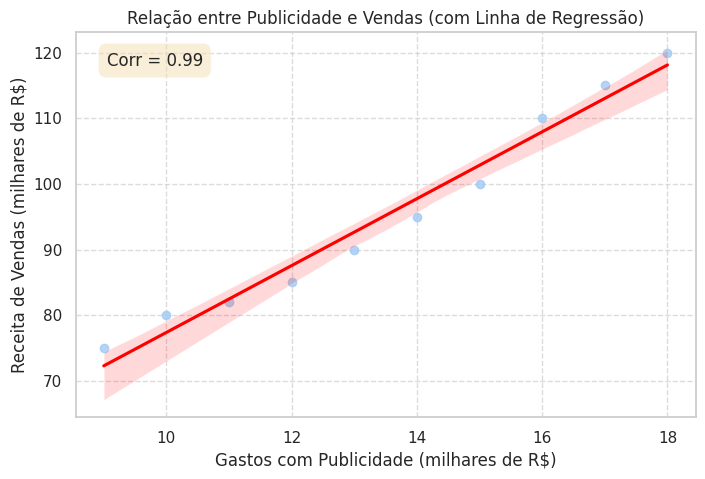

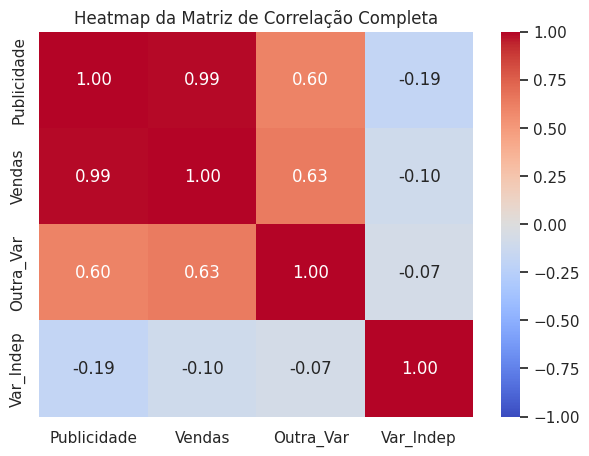

In [29]:
# Dados hipotéticos de gastos com publicidade e receita de vendas (em milhares de reais)
dados = {'Publicidade': [10, 12, 15, 13, 11, 16, 14, 18, 9, 17], # Mais dados
         'Vendas': [80, 85, 100, 90, 82, 110, 95, 120, 75, 115]} # Mais dados
df = pd.DataFrame(dados)

# Calcular a covariância
matriz_covariancia = df.cov() # Calcula a matriz de covariância
covariancia = matriz_covariancia.loc['Publicidade', 'Vendas'] # Pega o valor específico
print(f"\nMatriz de Covariância:\n{matriz_covariancia.round(2)}")
print(f"Covariância entre gastos com publicidade e receita de vendas: {covariancia:.2f}")

# Calcular a correlação
matriz_correlacao = df.corr(method='pearson') # method='pearson' (padrão), 'kendall', 'spearman'
correlacao = matriz_correlacao.loc['Publicidade', 'Vendas']
print(f"\nMatriz de Correlação (Pearson):\n{matriz_correlacao.round(2)}")
print(f"Correlação entre gastos com publicidade e receita de vendas: {correlacao:.2f}")

# Visualização opcional da relação
plt.figure(figsize=(8, 5))
# sns.scatterplot(data=df, x='Publicidade', y='Vendas') # Scatter plot simples
sns.regplot(data=df, x='Publicidade', y='Vendas', line_kws={'color': 'red'}) # Scatter com linha de regressão
plt.title('Relação entre Publicidade e Vendas (com Linha de Regressão)')
plt.xlabel('Gastos com Publicidade (milhares de R$)')
plt.ylabel('Receita de Vendas (milhares de R$)')
plt.grid(linestyle='--', alpha=0.7)
# Adiciona o valor da correlação ao gráfico
plt.text(0.05, 0.95, f'Corr = {correlacao:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
plt.show()

# --- Bloco de Código Adicional: Heatmap da Correlação ---
# Útil quando há mais variáveis
df['Outra_Var'] = df['Publicidade'] * 0.5 + np.random.normal(0, 5, len(df)) # Adiciona outra variável correlacionada
df['Var_Indep'] = np.random.rand(len(df)) * 100 # Adiciona variável independente

matriz_corr_completa = df.corr()
plt.figure(figsize=(7, 5))
sns.heatmap(matriz_corr_completa, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1, center=0)
plt.title('Heatmap da Matriz de Correlação Completa')
plt.show()
# --- Fim Bloco de Código Adicional ---

Neste exemplo, a covariância positiva e a correlação próxima de 1 indicam uma forte relação linear positiva entre os gastos com publicidade e a receita de vendas, sugerindo que o aumento dos gastos com publicidade está associado a um aumento na receita de vendas.

**10. Teste de Hipóteses: Tomando Decisões Baseadas em Dados**

O teste de hipóteses é uma ferramenta fundamental na estatística inferencial para tomar decisões sobre populações com base em amostras de dados. Vários testes de hipóteses estão disponíveis, dependendo do tipo de dados e da pergunta de pesquisa.

**10.1 Teste T**

O teste t é usado para comparar as médias de duas amostras. Existem diferentes tipos de testes t, incluindo o teste t independente (para comparar as médias de dois grupos independentes) e o teste t pareado (para comparar as médias da mesma amostra em dois momentos diferentes ou sob duas condições diferentes).

Exemplo: Comparar o desempenho de dois programas de treinamento de funcionários.

<ipython-input-30-6202458c2531>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_treinamento, x='Grupo', y='Pontuacao', palette='Set1')


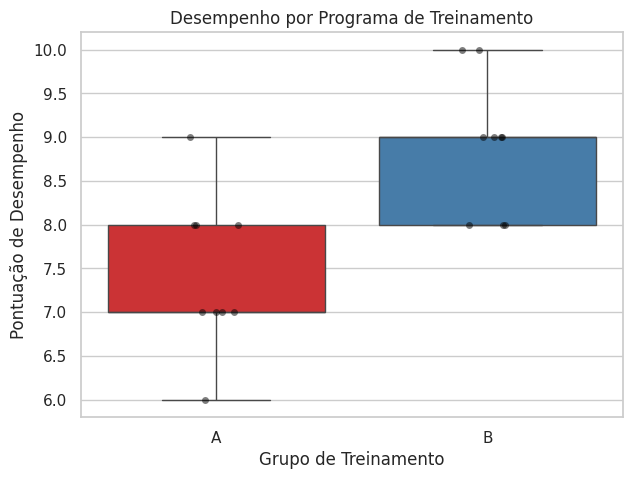


Teste de Levene p-valor: 0.710 (Variâncias Iguais = True)

Teste T para comparar médias de dois grupos:
Média Grupo A: 7.44, Média Grupo B: 8.89
Estatística t = -3.68, Valor p = 0.002
Como p < alpha, concluímos que há uma diferença significativa no desempenho médio entre os dois programas de treinamento.


In [30]:
# Dados hipotéticos de pontuações de desempenho para dois grupos de funcionários (escala de 1 a 10)
grupo_A = np.array([7, 8, 7, 9, 6, 8, 7, 7, 8]) # Mais dados
grupo_B = np.array([9, 8, 10, 9, 8, 9, 10, 8, 9]) # Mais dados

# --- Bloco de Código Adicional: Visualização para Teste T ---
df_treinamento = pd.DataFrame({
    'Pontuacao': np.concatenate([grupo_A, grupo_B]),
    'Grupo': ['A'] * len(grupo_A) + ['B'] * len(grupo_B)
})
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_treinamento, x='Grupo', y='Pontuacao', palette='Set1')
sns.stripplot(data=df_treinamento, x='Grupo', y='Pontuacao', color='black', alpha=0.5, jitter=0.1) # Mostra pontos individuais
plt.title('Desempenho por Programa de Treinamento')
plt.xlabel('Grupo de Treinamento')
plt.ylabel('Pontuação de Desempenho')
plt.show()
# Visualmente, o Grupo B parece ter pontuações mais altas.
# --- Fim Bloco de Código Adicional ---


# Realizar um teste t independente
# Verifica se as amostras têm variâncias iguais (opcional, mas recomendado)
levene_test = stats.levene(grupo_A, grupo_B)
equal_var = levene_test.pvalue > 0.05 # Se p > 0.05, assume variâncias iguais
print(f"\nTeste de Levene p-valor: {levene_test.pvalue:.3f} (Variâncias Iguais = {equal_var})")

teste_t = stats.ttest_ind(grupo_A, grupo_B, equal_var=equal_var)
print(f"\nTeste T para comparar médias de dois grupos:")
print(f"Média Grupo A: {np.mean(grupo_A):.2f}, Média Grupo B: {np.mean(grupo_B):.2f}")
print(f"Estatística t = {teste_t.statistic:.2f}, Valor p = {teste_t.pvalue:.3f}")

alpha = 0.05
if teste_t.pvalue < alpha:
    print("Como p < alpha, concluímos que há uma diferença significativa no desempenho médio entre os dois programas de treinamento.")
else:
    print("Como p >= alpha, não há evidências suficientes para concluir que há uma diferença significativa no desempenho médio.")

# --- Bloco de Código Adicional: Teste T Pareado (Exemplo Conceitual) ---
# Se os dados fossem do MESMO grupo ANTES e DEPOIS do treinamento B
# pontuacao_antes = np.array([7, 8, 6, 7, 8, 7, 6])
# pontuacao_depois_B = np.array([9, 8, 8, 9, 10, 9, 8]) # Mesmos funcionários
# teste_t_pareado = stats.ttest_rel(pontuacao_antes, pontuacao_depois_B)
# print("\nExemplo Teste T Pareado:")
# print(f"t={teste_t_pareado.statistic:.2f}, p={teste_t_pareado.pvalue:.3f}")
# --- Fim Bloco de Código Adicional ---

**10.2 Teste Z**

O teste z é usado para comparar a média de uma amostra com uma média populacional conhecida, ou para comparar as médias de duas grandes amostras independentes quando o desvio padrão da população é conhecido.

Exemplo: Testar se a pontuação média de satisfação do cliente é superior a um determinado limite.

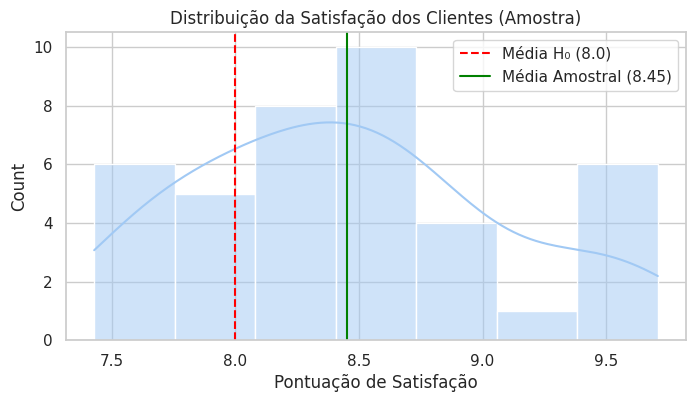


Teste Z para comparar média da amostra com média populacional:
Média amostral = 8.45
Estatística z = 4.56, Valor p (unilateral) = 0.000
Como p < alpha, concluímos que a pontuação média de satisfação do cliente é significativamente maior que 8.0.

Teste T (alternativa) para uma amostra:
Estatística t = 4.56, Valor p (unilateral) = 0.000


In [31]:
from statsmodels.stats.weightstats import ztest

# Dados hipotéticos de pontuações de satisfação do cliente (média da amostra)
# Amostra maior para justificar melhor o Z-test sem sigma conhecido
np.random.seed(200)
satisfacao_clientes = norm.rvs(loc=8.3, scale=0.6, size=40) # Média real 8.3, DP 0.6, N=40
media_populacional = 8.0  # Limite desejado de satisfação
# desvio_padrao_populacional = 0.5 # Se sigma populacional NÃO for conhecido,
                                   # para amostras grandes (n>30), pode-se usar o desvio padrão da amostra
                                   # como aproximação, ou usar t-test que é mais robusto.

# --- Bloco de Código Adicional: Visualização para Teste Z/T (Uma Amostra) ---
plt.figure(figsize=(8, 4))
sns.histplot(satisfacao_clientes, kde=True)
plt.axvline(media_populacional, color='red', linestyle='--', label=f'Média H₀ ({media_populacional})')
plt.axvline(np.mean(satisfacao_clientes), color='green', linestyle='-', label=f'Média Amostral ({np.mean(satisfacao_clientes):.2f})')
plt.title('Distribuição da Satisfação dos Clientes (Amostra)')
plt.xlabel('Pontuação de Satisfação')
plt.legend()
plt.show()
# A média amostral está acima da média de H₀. O teste dirá se é significativo.
# --- Fim Bloco de Código Adicional ---


# Realizar um teste z de uma amostra (Assumindo n suficientemente grande para usar std da amostra)
# value = média sob H₀; alternative='larger' testa se a média da amostra é MAIOR que 'value'
stat_z, p_valor_z = ztest(satisfacao_clientes, value=media_populacional, alternative='larger')

print(f"\nTeste Z para comparar média da amostra com média populacional:")
print(f"Média amostral = {np.mean(satisfacao_clientes):.2f}")
print(f"Estatística z = {stat_z:.2f}, Valor p (unilateral) = {p_valor_z:.3f}")

alpha = 0.05
if p_valor_z < alpha:
    print("Como p < alpha, concluímos que a pontuação média de satisfação do cliente é significativamente maior que 8.0.")
else:
    print("Como p >= alpha, não há evidências suficientes para concluir que a pontuação média de satisfação do cliente é significativamente maior que 8.0.")

# --- Bloco de Código Adicional: Teste T para Uma Amostra (Alternativa Robusta) ---
# ttest_1samp é mais apropriado se sigma populacional é desconhecido, mesmo com n > 30
t_stat_1samp, p_valor_t_1samp = stats.ttest_1samp(satisfacao_clientes, popmean=media_populacional, alternative='greater')
print(f"\nTeste T (alternativa) para uma amostra:")
print(f"Estatística t = {t_stat_1samp:.2f}, Valor p (unilateral) = {p_valor_t_1samp:.3f}")
# Os resultados de Z e T tendem a convergir para amostras grandes.
# --- Fim Bloco de Código Adicional ---

**10.3 Teste Qui-Quadrado**

O teste qui-quadrado é usado para testar a independência entre variáveis categóricas ou para comparar as frequências observadas com as frequências esperadas.

Exemplo: Testar se há uma associação entre o canal de marketing e a conversão de clientes.


--- Teste Qui-Quadrado ---
Tabela de Contingência Observada:
          Converteu  Nao Converteu
Canal A         50            100
Canal B         30             45
Canal C         40             95


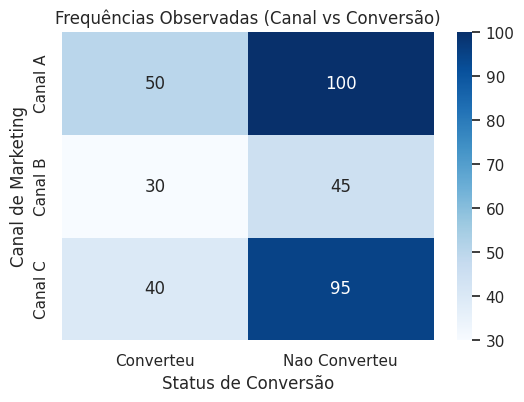

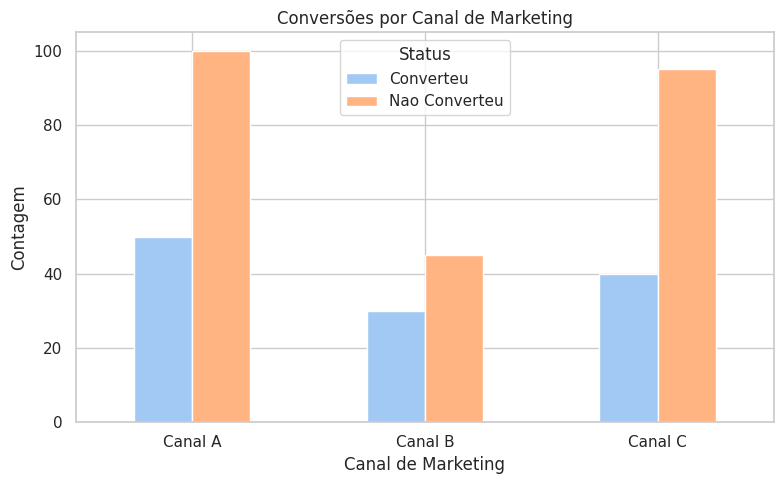


Teste Qui-Quadrado para independência de variáveis categóricas:
Estatística Qui-Quadrado = 2.33, Valor p = 0.311, Graus de Liberdade = 2

Frequências Esperadas (sob H₀ de independência):
          Converteu  Nao Converteu
Canal A       50.0          100.0
Canal B       25.0           50.0
Canal C       45.0           90.0

Como p (0.311) >= alpha (0.05), não há evidências suficientes para concluir que há uma associação significativa entre o canal de marketing e a conversão.


In [32]:
from scipy.stats import chi2_contingency

# Tabela de contingência com dados hipotéticos (Conversão vs Não-Conversão)
#           Conversão  Não-Conversão
observado = np.array([[50, 100],  # Canal A (mais observações)
                      [30, 45],   # Canal B
                      [40, 95]])  # Canal C (mais observações)
# Convertendo para DataFrame para melhor visualização
df_contingencia = pd.DataFrame(observado,
                               index=['Canal A', 'Canal B', 'Canal C'],
                               columns=['Converteu', 'Nao Converteu'])
print("\n--- Teste Qui-Quadrado ---")
print("Tabela de Contingência Observada:\n", df_contingencia)


# --- Bloco de Código Adicional: Visualização da Tabela de Contingência ---
# Heatmap das frequências observadas
plt.figure(figsize=(6, 4))
sns.heatmap(df_contingencia, annot=True, fmt="d", cmap="Blues")
plt.title('Frequências Observadas (Canal vs Conversão)')
plt.ylabel('Canal de Marketing')
plt.xlabel('Status de Conversão')
plt.show()

# Gráfico de barras empilhadas ou agrupadas
df_contingencia.plot(kind='bar', stacked=False, figsize=(8, 5), rot=0)
plt.title('Conversões por Canal de Marketing')
plt.xlabel('Canal de Marketing')
plt.ylabel('Contagem')
plt.legend(title='Status')
plt.tight_layout()
plt.show()
# Visualmente, parece haver diferenças nas taxas de conversão (proporção Convertido/Total)
# --- Fim Bloco de Código Adicional ---


# Realizar o teste qui-quadrado de independência
chi2, p, dof, expected = chi2_contingency(observado)
print(f"\nTeste Qui-Quadrado para independência de variáveis categóricas:")
print(f"Estatística Qui-Quadrado = {chi2:.2f}, Valor p = {p:.3f}, Graus de Liberdade = {dof}")
print("\nFrequências Esperadas (sob H₀ de independência):\n", pd.DataFrame(expected, index=df_contingencia.index, columns=df_contingencia.columns).round(2))

alpha = 0.05
if p < alpha:
    print(f"\nComo p ({p:.3f}) < alpha ({alpha}), concluímos que há uma associação significativa entre o canal de marketing e a conversão de clientes.")
else:
    print(f"\nComo p ({p:.3f}) >= alpha ({alpha}), não há evidências suficientes para concluir que há uma associação significativa entre o canal de marketing e a conversão.")

**10.4 Análise de Variância (ANOVA)**

A ANOVA é usada para comparar as médias de três ou mais grupos.

Exemplo: Comparar o desempenho de diferentes estratégias de preços em diferentes regiões.

<ipython-input-33-9f59a9f76861>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_anova, x='Estrategia', y='Receita', palette='Set3')


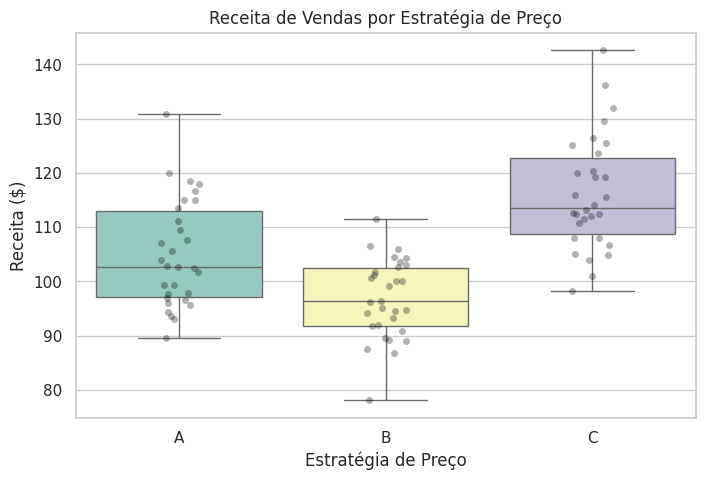


Teste ANOVA para comparar médias de três ou mais grupos:
Média A: 105.08, Média B: 96.82, Média C: 116.22
Estatística F = 32.61, Valor p = 2.71e-11
Como p (2.71e-11) < alpha (0.05), concluímos que há uma diferença significativa na receita média entre pelo menos duas das estratégias de preços.


In [33]:
# Dados hipotéticos de receita de vendas para três estratégias de preços
np.random.seed(300)
estrategia_A = norm.rvs(loc=105, scale=8, size=30)
estrategia_B = norm.rvs(loc=95, scale=7, size=30)
estrategia_C = norm.rvs(loc=115, scale=9, size=30)

# --- Bloco de Código Adicional: Visualização para ANOVA ---
df_anova = pd.DataFrame({
    'Receita': np.concatenate([estrategia_A, estrategia_B, estrategia_C]),
    'Estrategia': ['A'] * len(estrategia_A) + ['B'] * len(estrategia_B) + ['C'] * len(estrategia_C)
})
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_anova, x='Estrategia', y='Receita', palette='Set3')
sns.stripplot(data=df_anova, x='Estrategia', y='Receita', color='black', alpha=0.3, jitter=0.1)
plt.title('Receita de Vendas por Estratégia de Preço')
plt.xlabel('Estratégia de Preço')
plt.ylabel('Receita ($)')
plt.show()
# Visualmente, parece haver diferenças claras entre as médias das estratégias.
# --- Fim Bloco de Código Adicional ---


# Realizar o teste ANOVA de um fator (One-Way ANOVA)
f_statistic, p_value = stats.f_oneway(estrategia_A, estrategia_B, estrategia_C)
print(f"\nTeste ANOVA para comparar médias de três ou mais grupos:")
print(f"Média A: {np.mean(estrategia_A):.2f}, Média B: {np.mean(estrategia_B):.2f}, Média C: {np.mean(estrategia_C):.2f}")
print(f"Estatística F = {f_statistic:.2f}, Valor p = {p_value:.3g}") # Usando .3g para notação científica se p for muito pequeno

alpha = 0.05
if p_value < alpha:
    print(f"Como p ({p_value:.3g}) < alpha ({alpha}), concluímos que há uma diferença significativa na receita média entre pelo menos duas das estratégias de preços.")
    # Nota: Para saber QUAIS grupos diferem, testes post-hoc (ex: Tukey HSD) são necessários.
    # Exemplo Tukey HSD (requer statsmodels)
    # from statsmodels.stats.multicomp import pairwise_tukeyhsd
    # tukey = pairwise_tukeyhsd(endog=df_anova['Receita'], groups=df_anova['Estrategia'], alpha=0.05)
    # print("\nResultado Tukey HSD (Comparação Par-a-Par):")
    # print(tukey)
else:
    print(f"Como p ({p_value:.3g}) >= alpha ({alpha}), não há evidências suficientes para concluir que há uma diferença significativa na receita média.")

**10.5 Teste de Correlação**

O teste de correlação é usado para determinar se a correlação linear entre duas variáveis é estatisticamente significativa (ou seja, se a correlação observada na amostra é improvável de ter ocorrido por acaso se a correlação real na população fosse zero).

Exemplo: Testar a significância da correlação entre satisfação dos funcionários e produtividade.

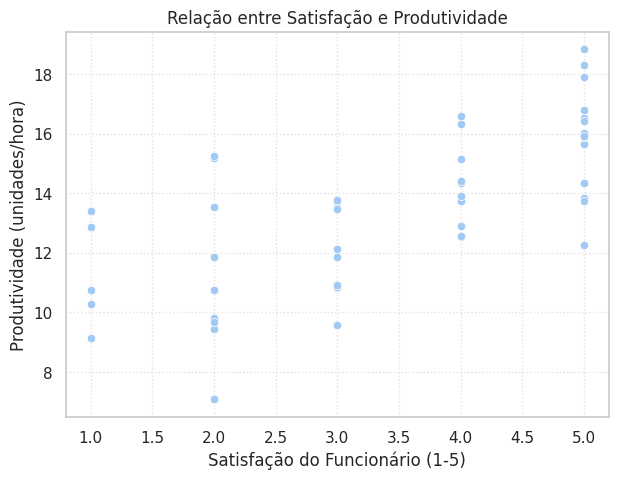


Teste de Correlação de Pearson:
Coeficiente de Correlação (r) = 0.70, Valor p = 1.16e-08
Como p (1.16e-08) < alpha (0.05), concluímos que há uma correlação linear significativa entre a satisfação dos funcionários e a produtividade.

Teste de Correlação de Spearman (Rank):
Coeficiente de Correlação (rho) = 0.74, Valor p = 1.01e-09


In [34]:
# Dados hipotéticos de satisfação dos funcionários (escala 1-5) e produtividade (unidades/hora)
np.random.seed(400)
satisfacao = np.random.randint(1, 6, size=50)
# Criar produtividade com alguma correlação + ruído
produtividade = 8 + satisfacao * 1.5 + np.random.normal(0, 2, size=50)
produtividade = np.clip(produtividade, 5, 25) # Limitar valores

# --- Bloco de Código Adicional: Visualização para Teste de Correlação ---
plt.figure(figsize=(7, 5))
sns.scatterplot(x=satisfacao, y=produtividade)
plt.title('Relação entre Satisfação e Produtividade')
plt.xlabel('Satisfação do Funcionário (1-5)')
plt.ylabel('Produtividade (unidades/hora)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()
# Visualmente, parece haver uma tendência positiva.
# --- Fim Bloco de Código Adicional ---


# Realizar o teste de correlação de Pearson
# H₀: A correlação populacional é zero (ρ = 0)
# H₁: A correlação populacional é diferente de zero (ρ ≠ 0)
correlacao, p_value = stats.pearsonr(satisfacao, produtividade)
print(f"\nTeste de Correlação de Pearson:")
print(f"Coeficiente de Correlação (r) = {correlacao:.2f}, Valor p = {p_value:.3g}")

alpha = 0.05
if p_value < alpha:
    print(f"Como p ({p_value:.3g}) < alpha ({alpha}), concluímos que há uma correlação linear significativa entre a satisfação dos funcionários e a produtividade.")
else:
    print(f"Como p ({p_value:.3g}) >= alpha ({alpha}), não há evidências suficientes para concluir que há uma correlação linear significativa.")

# --- Bloco de Código Adicional: Correlação de Spearman (Não-Linear/Ordinal) ---
# Útil se a relação não for linear ou os dados forem ordinais
correlacao_spearman, p_spearman = stats.spearmanr(satisfacao, produtividade)
print(f"\nTeste de Correlação de Spearman (Rank):")
print(f"Coeficiente de Correlação (rho) = {correlacao_spearman:.2f}, Valor p = {p_spearman:.3g}")
# --- Fim Bloco de Código Adicional ---

Em todos os testes de hipóteses, o valor p é crucial para a interpretação dos resultados. Um valor p baixo (tipicamente menor que 0.05) sugere que os resultados observados são improváveis de terem ocorrido por acaso, levando à rejeição da hipótese nula. É importante lembrar que a significância estatística não implica necessariamente significância prática no contexto dos negócios.

**11. Conclusões**

Este relatório demonstrou a importância e a aplicabilidade de diversos conceitos estatísticos no contexto de negócios, desde a descrição básica de dados até a realização de inferências e testes de hipóteses. Através de exemplos práticos e da implementação em Python, foi possível visualizar como a estatística pode ser utilizada para analisar dados, identificar padrões, prever resultados e, em última análise, auxiliar na tomada de decisões mais informadas e estratégicas.

A estatística descritiva fornece as ferramentas essenciais para resumir e entender as características fundamentais dos dados, permitindo uma primeira análise valiosa do cenário empresarial. As estatísticas inferenciais, por sua vez, possibilitam extrapolar conclusões de amostras para populações maiores, o que é crucial para pesquisas de mercado e para a avaliação do impacto de diferentes estratégias. A compreensão dos tipos de dados (qualitativos e quantitativos) e das técnicas de amostragem garante que as análises sejam realizadas com dados relevantes e representativos.

A probabilidade e as distribuições de probabilidades oferecem um arcabouço para modelar a incerteza e prever a ocorrência de eventos futuros, auxiliando na gestão de riscos e no planejamento estratégico. A análise de covariância e correlação permite quantificar as relações entre diferentes variáveis de negócios, identificando fatores que podem influenciar o desempenho. Finalmente, o teste de hipóteses fornece um método formal para validar suposições e tomar decisões baseadas em evidências estatísticas.

A capacidade de aplicar esses conceitos utilizando ferramentas como o Python, com suas bibliotecas Pandas, SciPy, NumPy, Matplotlib e Seaborn, torna a análise estatística acessível e prática para profissionais de negócios. A familiaridade com essas ferramentas e técnicas capacita as empresas a adotarem uma abordagem orientada por dados, o que é fundamental para o sucesso no ambiente competitivo atual. Em última análise, a integração da estatística nos processos de tomada de decisão permite que as empresas reduzam a margem de erro, otimizem seus recursos e alcancem seus objetivos de forma mais eficaz.

---

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://github.com/bryantcao/variance-metric-appender">https://github.com/bryantcao/variance-metric-appender</a></li>
  </ol>
</div>